# **COVID-19 Australia EDA**

## **Author:** Sherry Wang

## **Date:**19th of Oct (text edited on 30th of Oct)

---
## **Introduction**
In this notebook, we will focus on **Australia** only to conduct **exploratory data analysis** on this dataset in order to gain familiarity to understand the data. With the driving goal in mind " What is the death rate of COVID? And the uncertainties in data analysis. First data cleansing is performed to ensure the data is ready to use, this includes removing na values and re-formatting dataframe. Then basic statistic values and visualisations of variable will be used to assist in understanding the data and identifying simple trends. 

Datasets used in this notebook is sourced from [Our World in Data](https://ourworldindata.org/coronavirus) and [John Hopkins University](https://coronavirus.jhu.edu/map.html) both sources' data are updated daily and includes COVID data from Australia, which is suitable for this notebook's purpose.

## Data 1 - Our World in Data

There will be 2 separate datasets used in this notebook, hence the header is used to divide the analysis into two parts for clarity. The first section is analysis performed on data obtained from *Our World in Data*.

**Import data**-
The following code cell is to import all the libraries that is necessary for the analysis.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"
pd.options.mode.chained_assignment = None 


Install Orca package so that the plotly charts are able to display when downloaded. Retreived from: https://plotly.com/python/orca-management/

In [2]:
# !pip install plotly>=4.7.1
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

Read in data and take a glipse of the first 5 rows of the data set, the data is assigned to df.


In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


Count the dimensions of the dataframe 

In [5]:
df.shape

(57394, 50)

There are 53316 rows and 49 columns in this dataframe.

### Data Engineering

Dealing with missing values- counting the number of NA values in the dataset

In [6]:
df.isnull().sum(axis = 0)

iso_code                                323
continent                               646
location                                  0
date                                      0
total_cases                            3636
new_cases                               929
new_cases_smoothed                     1742
total_deaths                          13026
new_deaths                              929
new_deaths_smoothed                    1742
total_cases_per_million                3923
new_cases_per_million                   993
new_cases_smoothed_per_million         1807
total_deaths_per_million              13298
new_deaths_per_million                  993
new_deaths_smoothed_per_million        1807
reproduction_rate                     19698
icu_patients                          52904
icu_patients_per_million              52904
hosp_patients                         52389
hosp_patients_per_million             52389
weekly_icu_admissions                 57037
weekly_icu_admissions_per_millio

From the output above, we can see that for many countries we have many NA missing values that we are not able to obtain. These variables include number of icu_patients,female_smokers,handwashing_facilities etc. This might be due to technology inabilities or other reasons that impedes data collection, which is reasonable. Since in this stage of the analysis we are not looking into the other variables, therefore, in this stage we will leave the NA values untouched.

However, we would remove the rows with NAs for variable 'iso_code', because data with unidentified country code would not be useful for our data analysis, as we are analysisng accordingly to the countries.

In the code cell below we will remove the rows with missing country code.

In [7]:
df2=df.dropna(subset=['iso_code'])

In [8]:
df2.shape

(57071, 50)

We can see that approximately 300 rows have been removed.


Next we will subset Australia data to conduct focused analysis. 

In [9]:
aus=df2.loc[df['iso_code'] == "AUS"]

Print out the shape of the subsetted dataset.

In [10]:
aus.shape

(323, 50)

The subsetted data has 297 rows and 41 columns.

290 entries of data is recorded in this data set, and each row is recorded on separate dates

In the following cell, we are taking a quick look at the describtive statistics of the datasets

In [11]:
aus.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,298.000000,323.000000,317.000000,262.000000,323.000000,317.000000,298.000000,323.000000,317.000000,262.000000,...,3.230000e+02,323.0,3.230000e+02,323.00,323.0,323.0,0.0,3.230000e+02,3.230000e+02,323.000
mean,12794.020134,85.913313,87.404678,348.526718,2.808050,2.861237,501.728638,3.369164,3.427647,13.667760,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
std,10511.636356,140.943885,132.446748,356.003160,5.993293,4.934862,412.222946,5.527246,5.194001,13.960996,...,7.287247e-12,0.0,2.846581e-14,0.00,0.0,0.0,NaN,4.447783e-16,1.423290e-14,0.000
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.039000,0.000000,0.000000,0.039000,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
25%,5980.000000,7.000000,9.143000,95.250000,0.000000,0.000000,234.511000,0.275000,0.359000,3.735750,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
50%,7448.500000,18.000000,18.000000,106.000000,0.000000,0.286000,292.099500,0.706000,0.706000,4.157000,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
75%,26017.500000,97.500000,103.857000,801.500000,3.000000,3.000000,1020.298750,3.823500,4.073000,31.431250,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
max,27750.000000,721.000000,551.714000,907.000000,59.000000,22.000000,1088.240000,28.275000,21.636000,35.569000,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939


We can see from this output that the maximum increase in new confirmed cases daily is 721.00 and minimum is 0.00. Mean is 92.40 and median is 21.0.
For the variable new_deaths we can see the maximum is 59.0 and minimum is 0.00 per day, and with a mean of 3.04 and median is 0.00.

Looking at the spread of the data the standard deviation for new_tests which is the number of tests conducted daily is 20395.81 which is extremely high. This indicates that the number of tests taken by Australians has changed dramatically. Following that new_cases (the daily confirmed COVID-29 cases) has quite a significant standard deviation of 145.20, again this might demonstrate that COVID spreads in clusters and the numbers of infected individuals increases steeply. Additionally, the spread of the new_deaths daily is comparatively lower with a std of 6.19.

Next step of data cleaning, we need to check the data type for each variable and make changes if required.

In [12]:
aus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 2701 to 3023
Data columns (total 50 columns):
iso_code                              323 non-null object
continent                             323 non-null object
location                              323 non-null object
date                                  323 non-null object
total_cases                           298 non-null float64
new_cases                             323 non-null float64
new_cases_smoothed                    317 non-null float64
total_deaths                          262 non-null float64
new_deaths                            323 non-null float64
new_deaths_smoothed                   317 non-null float64
total_cases_per_million               298 non-null float64
new_cases_per_million                 323 non-null float64
new_cases_smoothed_per_million        317 non-null float64
total_deaths_per_million              262 non-null float64
new_deaths_per_million                323 non-null float64
new_deaths

We can notice that the data type for the variable dates is object, which is incorrect for our analysis purpose, we will need to change it in to date.

In [13]:
aus['date']=pd.to_datetime(aus['date'], errors='ignore')

In [14]:
aus['date'].dtypes

dtype('<M8[ns]')

In the above codes we converted the data variable from object to date format so we can continue with our analysis.


### EDA

Now we are going to explore and visualise single variables - cornfirmed cases & death cases graphing against time (timeseries).

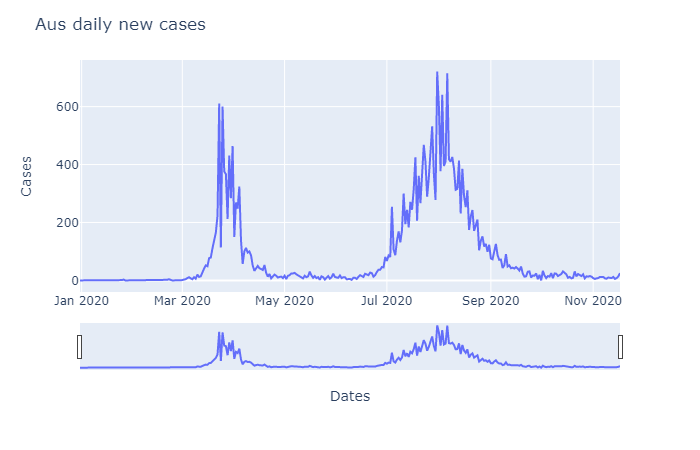

In [15]:
# Using plotly.express to graph new_cases against date
fig1 = px.line(aus, x='date', y="new_cases")
fig1.update_xaxes(rangeslider_visible=True)
fig1.update_layout(title='Aus daily new cases',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig1.show()

By graphing new cases daily vs the date, it is clear to observe there are 2 peaks which indicates 2 waves of COVID in Australia.(one in April and the other in June)

Next code cell we are graphing the variable new_deaths against dates.
 

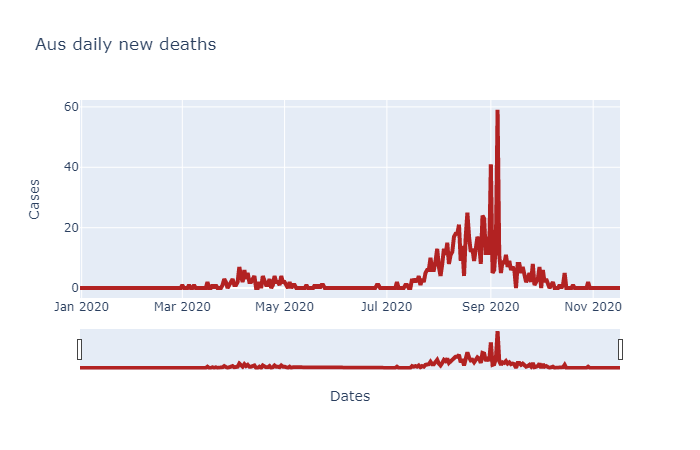

In [16]:
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=aus['date'], y=aus['new_deaths'], name='Deaths',
                         line=dict(color='firebrick', width=4)))
fig2.update_layout(title='Aus daily new deaths',
                   xaxis_title='Dates',
                   yaxis_title='Cases')

fig2.update_xaxes(rangeslider_visible=True)
fig2.show()

Again graphing it against the variable new_deaths we can comment that the second wave have resulted a larger peak, more numbers of deaths.

The next graph is the new daily testings conducted by Australians.

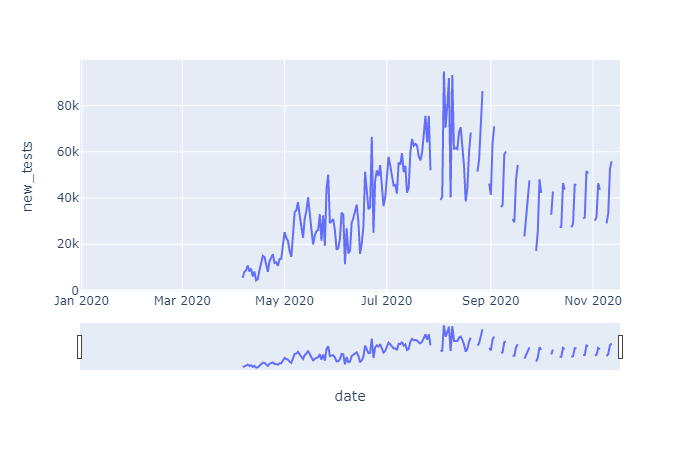

In [17]:
fig3 = px.line(aus, x='date', y="new_tests")
fig3.update_xaxes(rangeslider_visible=True)
fig2.update_layout(title='Aus daily new tests',
                   xaxis_title='Dates',
                   yaxis_title='Cases')
fig3.show()

The line graph above is for the variable new_tests which seems to have incomplete data, but we can still observe the pattern and conclude that there is a surge in testings during the second wave (from June) with increasing confirmed cases the correlation exists between the variables.(which we will investigate more about correlation later)

The following graph is the number of total cases (cumulative cases) versus the total deaths.

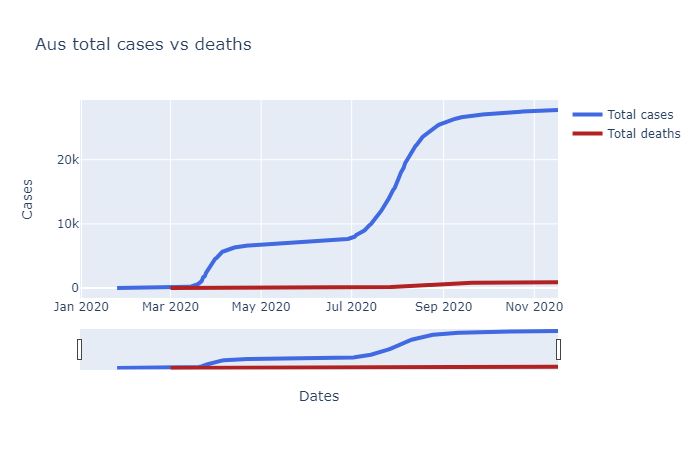

In [18]:
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=aus['date'], y=aus['total_cases'], name='Total cases',
                         line=dict(color='royalblue', width=4)))
fig4.add_trace(go.Scatter(x=aus['date'], y=aus['total_deaths'], name='Total deaths',
                         line=dict(color='firebrick', width=4)))

fig4.update_layout(title='Aus total cases vs deaths',
                   xaxis_title='Dates',
                   yaxis_title='Cases')

fig4.update_xaxes(rangeslider_visible=True)
fig4.show()

From the graph above we can visualise that as the total cases increases the total deaths indicates a trend that goes up too.

The code below will analyse for any correlation between variables by presenting the correlation matrix.

In [19]:
columns = ['total_cases','new_cases','total_deaths','new_deaths','total_tests','new_tests'] 
corr = aus[columns].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests
total_cases,1,0.076,0.95,0.39,0.97,0.41
new_cases,0.076,1,-0.25,0.4,0.047,0.63
total_deaths,0.95,-0.25,1,0.17,0.95,0.2
new_deaths,0.39,0.4,0.17,1,0.25,0.42
total_tests,0.97,0.047,0.95,0.25,1,0.45
new_tests,0.41,0.63,0.2,0.42,0.45,1


From the correlation matrix above, it is easy to spot the variables that are independent of each other and the variables that have strong correlations. The above matrix used a blue and red colour scale , where the more satuarated the red shade the stronger positive relationship exists between the variables. On the other end, ones with blue shades have weaker correlations and goes to the negative side of the scale. 

According to the correlation matrix above we can identify that total_cases has a strong relationship with total_deaths (0.94), it also has a strong positive correlation with total_tests (0.97). 



### Death rate

There are many different ways to calculate death rates. The Infection Fatality Ratio (IFR) which is 
>$IFR=\frac{Number of deaths }{Number of Infected}* 100$; 

the Case Fatality Ratio (CFR) which is 
>$CFR=\frac{Number of deaths of disease}{Number of confirmed}* 100$;

or CFR during an ongoing epidemic 

>$CFR=\frac{Number of deaths of disease}{Number of death+Number of recovered}* 100$

Retrieved from:
https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19

The following cell calculates the death rate of covid in australia using CFR method.

In [20]:
total_cases=aus['total_cases'].max()
total_deaths=aus['total_deaths'].max()
aus_CFR=total_deaths/total_cases*100
print('CFR for Australia is ',round(aus_CFR,2),'%')

CFR for Australia is  3.27 %


The overall CFR rate calculated for Australia is 3.29%. Note that there exists uncertainties in this reported number for example the uncertainties within the data records and the method of calculations.

## Data 2 
We read in John Hopkins COVID data (3 data sets in total - confirmed, recovered, and death cases) and conduct the same cleaning process to compare if there exists any inconsistencies or uncertainties in the data.


Data is sourced from the following site:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Now we will import and read the 3 datasets into dataframes and glimpse the first five rows of the data.

In [21]:
jh_confirmed=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
jh_death=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
jh_recovered=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [22]:
jh_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,42033,42092,42297,42463,42609,42795,42969,43035,43240,43403
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,23705,24206,24731,25294,25801,26211,26701,27233,27830,28432
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,61381,62051,62693,63446,64257,65108,65975,66819,67679,68589
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5319,5383,5437,5477,5567,5616,5725,5725,5872,5914
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12335,12433,12680,12816,12953,13053,13228,13374,13451,13615


In [23]:
jh_death.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1556,1558,1574,1577,1581,1591,1595,1605,1617,1626
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,557,559,571,579,590,598,605,612,623,631
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2036,2048,2062,2077,2093,2111,2124,2139,2154,2168
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,75,75,75,75,75,75,75,75,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,303,307,308,308,312,315,317,322,322,324


In [24]:
jh_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,34446,34458,34721,34954,34967,35024,35036,35067,35092,35137
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,12002,12092,12203,12353,12493,12574,12667,12767,12889,13453
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41783,42037,42325,42626,42980,42980,43779,44199,44633,45148
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4043,4248,4332,4405,4488,4585,4675,4675,4747,4830
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,5647,5899,5927,6036,6125,6250,6326,6345,6444,6523


From the output above, we can see that the dates are split up into separate columns which is in a wide format.

Then we will check if any NA, missing values exists for our data cleaning stage.

In [25]:
jh_confirmed.isnull().sum(axis = 0)

Province/State    188
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
10/18/20            0
10/19/20            0
10/20/20            0
10/21/20            0
10/22/20            0
10/23/20            0
10/24/20            0
10/25/20            0
10/26/20            0
10/27/20            0
10/28/20            0
10/29/20            0
10/30/20            0
10/31/20            0
11/1/20   

No missing values for the variable 'Country_Region' hence we won't remove any entries 


For all 3 data sets we will reshape the data from long to wide form for the ease of analysis, as later we will need to graph variables against the date. This will reform the separte date columns into one single column.

In [26]:
jh_confirmed2=jh_confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name = 'date', value_name = 'confirmed')
jh_death2=jh_death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name = 'date', value_name = 'death')
jh_recovered2=jh_recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name = 'date', value_name = 'recovered')


Now let's check the shape of the dataframe after transforming.

In [27]:
jh_confirmed2.shape

(80700, 6)

Now after using the melt function the dataframe only has 6 columns.
 
Next we will merge all 3 data together so we have the numbers of confirmed cases, death cases and recovered cases.

In [28]:
merge1=jh_confirmed2.merge(jh_death2, how='inner', left_on=["Province/State", "Country/Region","Lat","Long","date"], right_on=["Province/State", "Country/Region","Lat","Long","date"])

In [29]:
merged_jh=merge1.merge(jh_recovered2, how='inner', left_on=["Province/State", "Country/Region","Lat","Long","date"], right_on=["Province/State", "Country/Region","Lat","Long","date"])

Printing out the dataframe to check the merged dataframe.

In [30]:
merged_jh.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,death,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0


In [31]:
merged_jh.shape

(75000, 8)

The number of rows have reduced after we merged the data comparing to the data before merge, because not all entries have all confirmed, death, and recovered data recorded.

Next step is to filter out the data with country/region is Australia and print out the data.

In [32]:
aus_jh=merged_jh.loc[merged_jh['Country/Region'] == "Australia"]

In [33]:
aus_jh

,Province/State,Country/Region,Lat,Long,date,confirmed,death,recovered
8,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,1/22/20,0,0,0
10,Northern Territory,Australia,-12.4634,130.8456,1/22/20,0,0,0
11,Queensland,Australia,-27.4698,153.0251,1/22/20,0,0,0
12,South Australia,Australia,-34.9285,138.6007,1/22/20,0,0,0
13,Tasmania,Australia,-42.8821,147.3272,1/22/20,0,0,0
14,Victoria,Australia,-37.8136,144.9631,1/22/20,0,0,0
15,Western Australia,Australia,-31.9505,115.8605,1/22/20,0,0,0
258,Australian Capital Territory,Australia,-35.4735,149.0124,1/23/20,0,0,0
259,New South Wales,Australia,-33.8688,151.2093,1/23/20,0,0,0


Looking at the data printed above, the major difference between this dataset with the first one is that this new data splits the confirmed,death, recovered cases by Province/State.

Hence the next step we will group by the data by date so that the cases by states are combined into one row.

In [34]:
aus_jh2=aus_jh.groupby(['date']).sum()


In [35]:
aus_jh2=aus_jh2.reset_index()
aus_jh2

,date,Lat,Long,confirmed,death,recovered
0,1/22/20,-256.8502,1130.8439,0,0,0
1,1/23/20,-256.8502,1130.8439,0,0,0
2,1/24/20,-256.8502,1130.8439,0,0,0
3,1/25/20,-256.8502,1130.8439,0,0,0
4,1/26/20,-256.8502,1130.8439,4,0,0
5,1/27/20,-256.8502,1130.8439,5,0,0
6,1/28/20,-256.8502,1130.8439,5,0,0
7,1/29/20,-256.8502,1130.8439,6,0,0
8,1/30/20,-256.8502,1130.8439,9,0,2
9,1/31/20,-256.8502,1130.8439,9,0,2


Now we can see that each day we have one corresponding row.

Next code cell will try to understand the new data and compare the 2 different datasets using the statistic descriptions.

In [36]:
aus_jh.describe()

,Lat,Long,confirmed,death,recovered
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,-32.106275,141.355488,1595.557083,38.371250,1298.094167
std,8.505193,11.774364,4013.190599,142.089279,3491.657113
min,-42.882100,115.860500,0.000000,0.000000,0.000000
25%,-36.058525,136.661925,33.000000,0.000000,18.000000
50%,-34.398650,146.145150,230.000000,4.000000,216.000000
75%,-30.830325,149.561625,1067.000000,13.000000,1046.000000
max,-12.463400,153.025100,20347.000000,819.000000,19523.000000


In [37]:
aus.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,298.000000,323.000000,317.000000,262.000000,323.000000,317.000000,298.000000,323.000000,317.000000,262.000000,...,3.230000e+02,323.0,3.230000e+02,323.00,323.0,323.0,0.0,3.230000e+02,3.230000e+02,323.000
mean,12794.020134,85.913313,87.404678,348.526718,2.808050,2.861237,501.728638,3.369164,3.427647,13.667760,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
std,10511.636356,140.943885,132.446748,356.003160,5.993293,4.934862,412.222946,5.527246,5.194001,13.960996,...,7.287247e-12,0.0,2.846581e-14,0.00,0.0,0.0,NaN,4.447783e-16,1.423290e-14,0.000
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.039000,0.000000,0.000000,0.039000,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
25%,5980.000000,7.000000,9.143000,95.250000,0.000000,0.000000,234.511000,0.275000,0.359000,3.735750,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
50%,7448.500000,18.000000,18.000000,106.000000,0.000000,0.286000,292.099500,0.706000,0.706000,4.157000,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
75%,26017.500000,97.500000,103.857000,801.500000,3.000000,3.000000,1020.298750,3.823500,4.073000,31.431250,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939
max,27750.000000,721.000000,551.714000,907.000000,59.000000,22.000000,1088.240000,28.275000,21.636000,35.569000,...,4.464871e+04,0.5,1.077910e+02,5.07,13.0,16.5,NaN,3.840000e+00,8.344000e+01,0.939


Note that from the comparison between the statistic descriptions we can see that the minimum , maximum values are different.(comparison are made with the total_cases and total_deaths)

Next graphs will be plotted against date to visualise the variables in the new dataset.

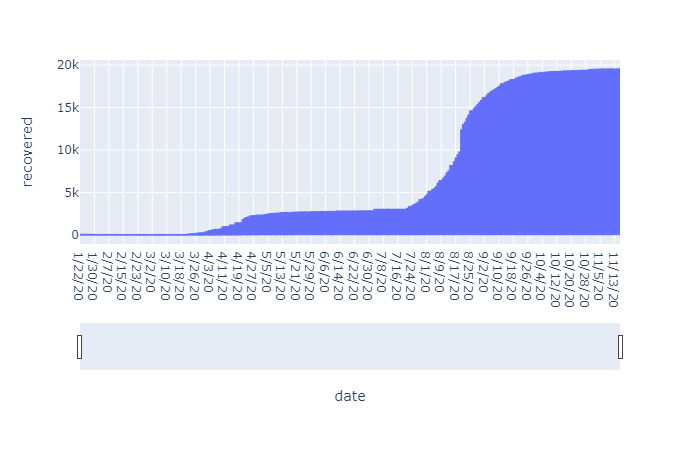

In [38]:
#plot of recovered cases first
fig5 = px.line(aus_jh, x='date', y="recovered")
#fig5 = px.line(aus_jh, x='date', y="death")
fig5.update_xaxes(rangeslider_visible=True)

fig5.show()

Ploting with confirmed,recovered and death variable together

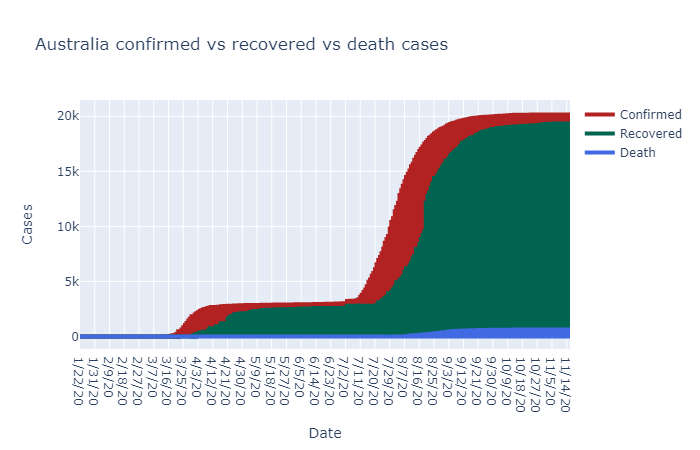

In [39]:

fig6 = go.Figure()
# Create and style traces
fig6.add_trace(go.Scatter(x=aus_jh['date'], y=aus_jh['confirmed'], name='Confirmed',
                         line=dict(color='firebrick', width=4)))
fig6.add_trace(go.Scatter(x=aus_jh['date'], y=aus_jh['recovered'], name = 'Recovered',
                         line=dict(color='rgb(0,100,80)', width=4)))
fig6.add_trace(go.Scatter(x=aus_jh['date'], y=aus_jh['death'], name = 'Death',
                         line=dict(color='royalblue', width=4)))

# Edit the layout
fig6.update_layout(title='Australia confirmed vs recovered vs death cases',
                   xaxis_title='Date',
                   yaxis_title='Cases')


fig6.show()

We can observe that the confirmed cases and the curve for recovered caese follows a similar shape. The death cases has increased since the second wave with a slower growth rate than the confirmed and recovered cases.

### Death rate

Calculate the new death rate using the second data set, using 2 methods :the CFR ongoing and CFR formula as stated in the beginning.

In [40]:
confirmed=aus_jh2['confirmed'].max()
death=aus_jh2['death'].max()
recovered=aus_jh2['recovered'].max()
confirmed

27758

In [41]:
#rounded to 2 significant figures for consistency to compare
aus_CFR_ongoing=death/(death+recovered)*100
print('CFR during an ongoing epidemic for Australia is ',round(aus_CFR_ongoing,1))

CFR during an ongoing epidemic for Australia is  3.4


In [42]:
#rounded to 2 significant figures
aus_CFR2=death/confirmed*100

print('CFR for Australia is ',round(aus_CFR2,1))

CFR for Australia is  3.3


Death rate using the same method but 2 different data sets from Our world of data and John Hopkins are different and this is due to the fact that the data reported for both data sets are different. 

Using a different method to calculate CFR has also resulted in a slightly higher death rate. These differences are all the uncertainties we can further investigate in, uncertainties between the raw data itself, and uncertainties in the methods of death rate's calculation.

### Uncertainties

Now let's investigate and visualise the uncertainties for the death rates in the data analysis steps.

Firstly, as observed above the death rates varies between the different data sets and between different methods of calculations. Let's continue to see how we can better present the data so that any data uncertainty is included and explained to the audience.


Start by analysing the uncertianties between the two data sets due to the inconsistencies in the data sources.

In [43]:
diff_datasets=aus_CFR-aus_CFR2

In [44]:
#rounded to 2 significant figures to keep consistent
round(aus_CFR2,1)

3.3

In [45]:
#rounded to 2 significant figures
round(diff_datasets,4)

0.0009

The percentage of difference/variance is printed below

In [46]:
#rounded to 2 significant figures
round(diff_datasets/aus_CFR*100,3)


0.029

Now visualise the differences between the 2 datasets

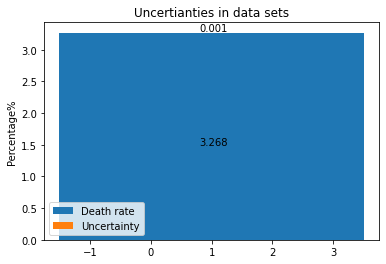

In [47]:
p1 = plt.bar(1, aus_CFR2, 5) #, yerr=diff_datasets
p2 = plt.bar(1, diff_datasets, 5,bottom=aus_CFR)

plt.ylabel('Percentage%')
plt.title('Uncertianties in data sets')
#plt.xticks('')
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Death rate', 'Uncertainty'))
plt.annotate(round(aus_CFR,3),xy=(0.8,1.5))
plt.annotate(round(diff_datasets,3),xy=(0.8,3.3))
plt.show()

Calculating the differences between the 2 calculation methods

In [48]:
diff_cal=aus_CFR_ongoing-aus_CFR2
round(diff_cal,2)

0.17

The percentage of variance is printed below

In [49]:
round(diff_cal/aus_CFR_ongoing*100,2)


4.87

Now visualise the differences between the 2 calculation methods

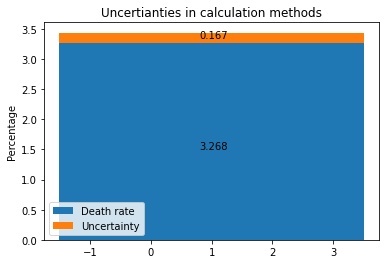

In [50]:
p1 = plt.bar(1, aus_CFR2, 5) #, yerr=diff_datasets
p2 = plt.bar(1, diff_cal , 5,bottom=aus_CFR)

plt.ylabel('Percentage')
plt.title('Uncertianties in calculation methods')
#plt.xticks(ind, ('G1'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Death rate', 'Uncertainty'))
plt.annotate(round(aus_CFR2,3),xy=(0.8,1.5))
plt.annotate(round(diff_cal,3),xy=(0.8,3.35))
plt.show()

Above we explored both the uncertianties between data sets and the undertainties between the different methods of calculating death rates both lead to slight differences in the final death rate. It is also clear to observe that the variance between the 2 different methods of calculation (0.180) is greater than the variances between two sources of data. (0.001)


# Conclusion

In this file, the EDA is only conducted on 3 major variables, the number of confirmed, recovered and deaths. From the descriptive statistics and visualisations we were able to determine the trends in the cases with a two stages of COVID. Strong positive correlations were found between the total number of cases, total number of deaths and total number of testings. Also, the there exists huge variances between the number of cases recorded daily, slightly smaller variance in the new deaths. 
Uncertainties are found between the different datasets and with different calculation methods for the death rates. The percentage of the uncertainty was larger while using different formulas to calculate the death rate and much smaller (can be almost ignored).

More variables and datasets will be explored to assess the death rates and the uncertianties associated with it. 

More ideas around uncertainties that can be considered later:


1.   Uncertainties in the methods of visualsation (e.g. choice of graphs, use of comparison)
2.   Uncertainties between different coutries (e.g. diffent detecting methods, missing data)
3.   Uncertainties in the process of data cleaning, transformation, engineering stages



